In [1]:
import pandas as pd
df = pd.read_csv('../data/us_congressional_record/us_congress_speeches_sample_1000.csv')
df.dropna(subset=['doc_clean'], inplace=True)
df = df.reset_index(drop=True)

import sys
sys.path.append('../gtm/')

from corpus import GTMCorpus
train_dataset = GTMCorpus(
    df, 
    prevalence = "~ Rep", 
    content = "~ Rep",
    vectorizer_args={'ngram_range':(1, 1), 'max_df':0.99, 'min_df':0.01}
)

from optimizer import GTMOptimizer
opt = GTMOptimizer(n_topics=[10], w_priors = [1.0, 10.0], n_samples=1)
opt.optimize(train_dataset)

/home/germain/Documents/topic models/generalized_topic_model_dev/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Stopping at Epoch 2. Reverting to Epoch 2

Stopping at Epoch 2. Reverting to Epoch 2


In [2]:
opt.grid

,n_topics,doc_topic_prior,alpha,encoder_input,encoder_hidden_layer,encoder_non_linear_activation,encoder_bias,decoder_hidden_layer,decoder_non_linear_activation,decoder_bias,...,predictor_non_linear_activation,w_prior,w_pred_loss,seed,config_id,diversity,c_npmi,c_v,c_uci,umass
0,10,logistic_normal,0.1,bow,"[1024, 512]",relu,True,"[512, 1024]",relu,True,...,relu,1.0,1,0,1,0.11,-0.842704,0.360079,-0.114125,-0.842704
1,10,logistic_normal,0.1,bow,"[1024, 512]",relu,True,"[512, 1024]",relu,True,...,relu,10.0,1,0,2,0.12,-0.849648,0.357353,-0.118647,-0.849648


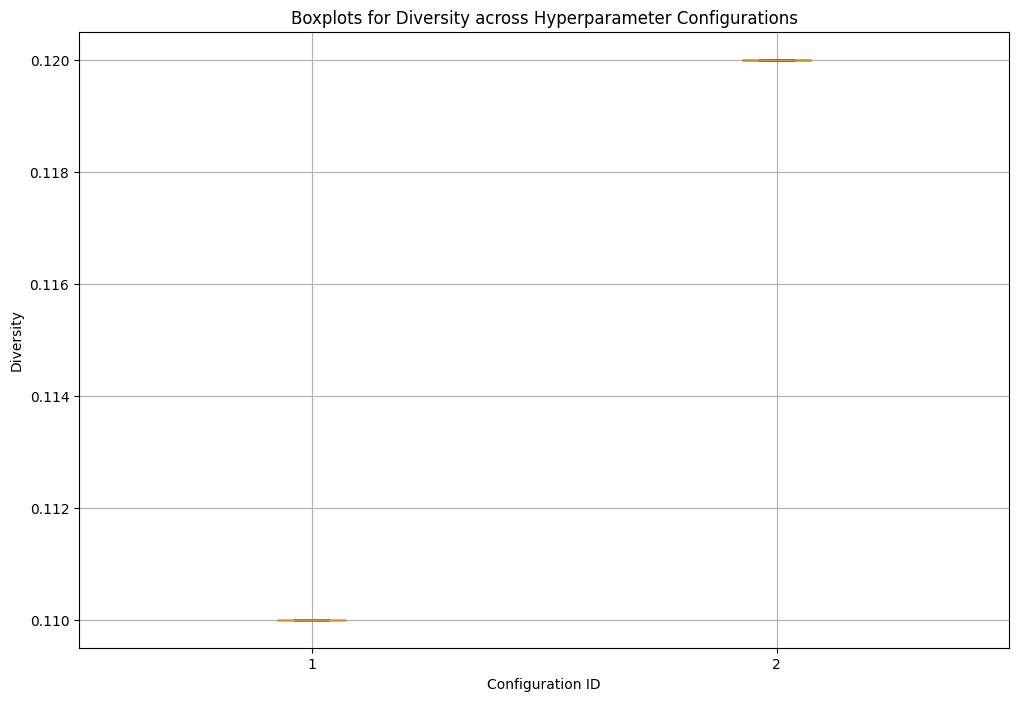

In [3]:
opt.plot_evaluation_metric(metric = "diversity")

In [4]:
best_model_params, gtm = opt.get_best_model(metric = 'c_uci')

In [5]:
best_model_params

{'n_topics': 10,
 'doc_topic_prior': 'logistic_normal',
 'alpha': 0.1,
 'encoder_input': 'bow',
 'encoder_hidden_layer': [1024, 512],
 'encoder_non_linear_activation': 'relu',
 'encoder_bias': True,
 'decoder_hidden_layer': [512, 1024],
 'decoder_non_linear_activation': 'relu',
 'decoder_bias': True,
 'predictor_hidden_layer': [],
 'predictor_non_linear_activation': 'relu',
 'w_prior': 1.0,
 'w_pred_loss': 1,
 'seed': 0,
 'config_id': 1,
 'diversity': 0.11,
 'c_npmi': -0.842703700752095,
 'c_v': 0.3600787260459356,
 'c_uci': -0.11412474202061958,
 'umass': -0.842703700752095}